In [35]:
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
import math

qc=QuantumCircuit(1)
qc.h(0)
state1=Statevector.from_instruction(qc)
qc.p(math.pi/2,0)
state2=Statevector.from_instruction(qc)
qc.draw(output="mpl")
states=state1,state2

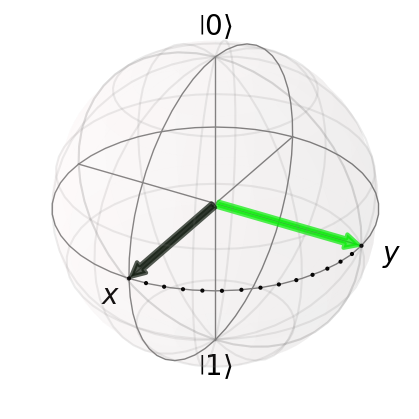

In [36]:
from qiskit.visualization.bloch import Bloch
from qiskit.visualization.state_visualization import _bloch_multivector_data
import numpy as np
 
def plot_Nstates(states, axis, plot_trace_points=True):
    """This function plots N states to 1 Bloch sphere"""
    bloch_vecs = [_bloch_multivector_data(s)[0] for s in states]
 
    if axis is None:
        bloch_plot = Bloch()
    else:
        bloch_plot = Bloch(axes=axis)
 
    bloch_plot.add_vectors(bloch_vecs)
 
    if len(states) > 1:
 
        def rgba_map(x, num):
            g = (0.95 - 0.05) / (num - 1)
            i = 0.95 - g * num
            y = g * x + i
            return (0.0, y, 0.0, 0.7)
 
        num = len(states)
        bloch_plot.vector_color = [rgba_map(x, num) for x in range(1, num + 1)]
 
    bloch_plot.vector_width = 3
    bloch_plot.vector_style = "simple"
 
    if plot_trace_points:
 
        def trace_points(bloch_vec1, bloch_vec2):
            # bloch_vec = (x,y,z)
            n_points = 15
            thetas = np.arccos([bloch_vec1[2], bloch_vec2[2]])
            phis = np.arctan2(
                [bloch_vec1[1], bloch_vec2[1]], [bloch_vec1[0], bloch_vec2[0]]
            )
            if phis[1] < 0:
                phis[1] = phis[1] + 2 * pi
            angles0 = np.linspace(phis[0], phis[1], n_points)
            angles1 = np.linspace(thetas[0], thetas[1], n_points)
 
            xp = np.cos(angles0) * np.sin(angles1)
            yp = np.sin(angles0) * np.sin(angles1)
            zp = np.cos(angles1)
            pnts = [xp, yp, zp]
            bloch_plot.add_points(pnts)
            bloch_plot.point_color = "k"
            bloch_plot.point_size = [4] * len(bloch_plot.points)
            bloch_plot.point_marker = ["o"]
 
        for i in range(len(bloch_vecs) - 1):
            trace_points(bloch_vecs[i], bloch_vecs[i + 1])
 
    bloch_plot.sphere_alpha = 0.05
    bloch_plot.frame_alpha = 0.15
    bloch_plot.figsize = [4, 4]
 
    bloch_plot.render()
 
 
plot_Nstates(states, axis=None, plot_trace_points=True)

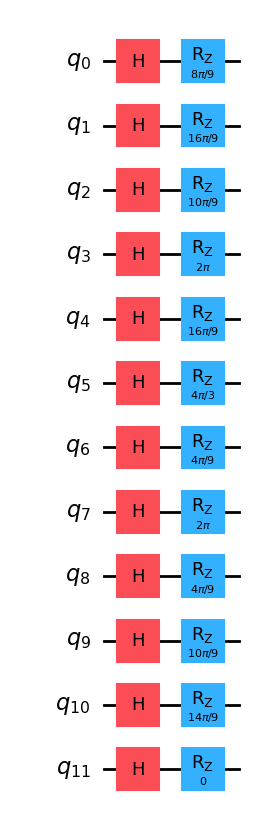

In [39]:
phase_data=[4,8,5,9,8,6,2,9,2,5,7,0]
qc2=QuantumCircuit(len(phase_data))
for i in range(len(phase_data)):
    qc2.h(i)
    qc2.rz(phase_data[i]*2*math.pi/float(max(phase_data)),i)
qc2.draw(output="mpl")